In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("boston.csv")

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#checking missing values & duplicated values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikat maupun missing values pada data ini, sehingga kita bisa melanjutkan pengerjaan tanpa perlu melakukan menghilangkan data duplikat dan data yang hilang ataupun melakukan imputasi.

# Split Data

In [ ]:
#split the data
from sklearn.model_selection import train_test_split

feature = df.drop("medv", axis = 1)
target = df[['medv']]

#first split pretrain and test
feature_pre, feature_test, target_pre, target_test = train_test_split(feature, target, random_state = 42, train_size = 0.8)

#second split train and validation
feature_train, feature_val, target_train, target_val = train_test_split(feature_pre, target_pre, random_state = 42, train_size = 0.8)

#Multicollinearity check and feature selection

In [ ]:
# calculating VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


Berdasarkan VIF, ada beberapa fitur yang kemungkinan memiliki korelasi yang tinggi dengan fitur lain, yaitu:
- `nox`
- `dis`
- `rad`
- `tax`

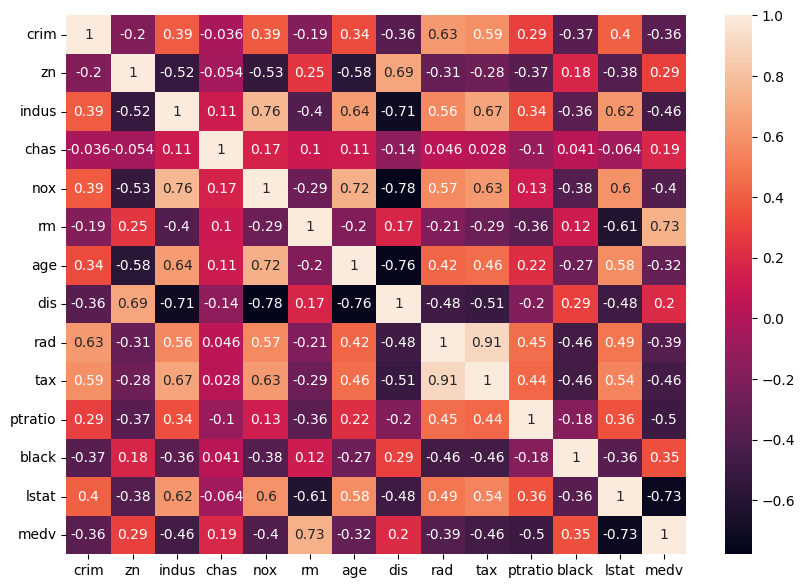

In [ ]:
#correlation
train = pd.concat([feature_train, target_train], axis=1)
corr = train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.show()

Dari heatmap, terlihat bahwa `rad` dan `tax` memiliki korelasi yang sangat tinggi (0.91). Ada beberapa kolom lain yang juga memiliki nilai korelasi yang tinggi (berkisar |0.7|-|0.79|, tetapi karena dipilih thresholdnya adalah |0.8|, kolom-kolom tersebut tidak diperhatikan lagi.

Diputuskan untuk mempertahankan `tax` karena memiliki korelasi yang sedikit lebih baik dengan variabel target, `medv`.

In [ ]:
feature_train = feature_train.drop('rad', axis=1)
feature_val = feature_val.drop('rad', axis=1)
feature_test = feature_test.drop('rad', axis=1)

In [ ]:
X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.615076
2,zn,2.415036
3,indus,3.500250
4,chas,1.097962
5,nox,4.552308
6,rm,1.923266
7,age,3.119817
8,dis,4.390362
9,tax,3.191363
10,ptratio,1.804558


# Building Model & Fitting Model

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_train, y_train)
lasso_reg_pointone.fit(X_train, y_train)
lasso_reg_one.fit(X_train, y_train)
lasso_reg_ten.fit(X_train, y_train)

Lasso(alpha=10, random_state=42)

#Choose the best lambda from validation set

In [ ]:
from sklearn.metrics import mean_squared_error

X_val = feature_val.to_numpy()
y_val = target_val.to_numpy()
y_val = y_val.reshape(len(y_val),)

alphas = [0.01,0.1,1,10]

models_ridge = [ridge_reg_pointzeroone,
                ridge_reg_pointone,
                ridge_reg_one,
                ridge_reg_ten]

models_lasso = [lasso_reg_pointzeroone,
                lasso_reg_pointone,
                lasso_reg_one,
                lasso_reg_ten]

for model, alpha in zip(models_ridge, alphas):
  y_pred_val = model.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred_val, squared=False)
  print(f'RMSE dari Regresi Ridge dengan lambda = {alpha} adalah {rmse}')

for model, alpha in zip(models_lasso, alphas):
  y_pred_val = model.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred_val, squared=False)
  print(f'RMSE dari Regresi Lasso dengan lambda = {alpha} adalah {rmse}')

RMSE dari Regresi Ridge dengan lambda = 0.01 adalah 4.960676932957843
RMSE dari Regresi Ridge dengan lambda = 0.1 adalah 4.94941253512279
RMSE dari Regresi Ridge dengan lambda = 1 adalah 4.912351371579992
RMSE dari Regresi Ridge dengan lambda = 10 adalah 4.871717983886228
RMSE dari Regresi Lasso dengan lambda = 0.01 adalah 4.934105658639752
RMSE dari Regresi Lasso dengan lambda = 0.1 adalah 4.907145314259478
RMSE dari Regresi Lasso dengan lambda = 1 adalah 4.845855910636398
RMSE dari Regresi Lasso dengan lambda = 10 adalah 5.426622694252769


Dari data di atas, terlihat bahwa untuk regresi Ridge, nilai terbaik (rmse terendah) didapatkan oleh lambda dengan nilai 10, sedangkan untuk regresi Lasso didapatkan oleh lambda dengan nilai 1.

In [ ]:
ridge_best = ridge_reg_ten

coef_df_ridge = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df_ridge

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


Dari data koefisien model terbaik ridge di atas, bisa dikatakan bahwa untuk fitur `chas` yang terkait dengan status berbatasan dengan Sungai Charles rumah, perubahan satu poinnya menyumbang 1.956 kepada harga rumah. Sedangkan fitur `nox` yang mengacu pada konsentrasi oksida nitrat, perubahan satu poinnya menyumbang 1.568 kepada harga rumah.

In [ ]:
lasso_best = lasso_reg_one

coef_df_lasso = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df_lasso

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


Dari data koefisien model terbaik lasso di atas, dapat dikatakan bahwa fitur `rm` yang mengacu pada rata-rata jumlah kamar per hunian menyumbang 2.5 pada harga rumah untuk perubahan satu poinnya.

# Model Evaluation using test data

In [ ]:
#evaluasi model ridge dengan data test
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

X_test = feature_test
y_test = target_test

y_pred_test = ridge_best.predict(X_test)

print(f'RMSE untuk data testing adalah {mean_squared_error(y_test, y_pred_test, squared=False)}')
print(f'MAE untuk data testing adalah {mean_absolute_error(y_test, y_pred_test)}')
print(f'MAPE untuk data testing adalah {mean_absolute_percentage_error(y_test, y_pred_test)}')

RMSE untuk data testing adalah 5.158908333657057
MAE untuk data testing adalah 3.244481645704498
MAPE untuk data testing adalah 0.17618402626767926


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Menggunakan metrik untuk evaluasi model, terlihat bahwa untuk model lasso regression, nilai prediksi menyimpang sekitar 3.24 terhadap nilai sebenarnya atau sekitar 17.6% persen relatif terhadap nilai sebenarnya pada testing. Standar deviasi dari model ini adalah 5.15.

In [ ]:
#evaluasi model lasso dengan data test
X_test = feature_test
y_test = target_test

y_pred_test = lasso_best.predict(X_test)

print(f'RMSE untuk data testing adalah {mean_squared_error(y_test, y_pred_test, squared=False)}')
print(f'MAE untuk data testing adalah {mean_absolute_error(y_test, y_pred_test)}')
print(f'MAPE untuk data testing adalah {mean_absolute_percentage_error(y_test, y_pred_test)}')

RMSE untuk data testing adalah 5.125494212319777
MAE untuk data testing adalah 3.3980507105960682
MAPE untuk data testing adalah 0.17856606338732206


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Menggunakan metrik untuk evaluasi model, terlihat bahwa untuk model lasso regression, nilai prediksi menyimpang sekitar 3.39 terhadap nilai sebenarnya atau sekitar 17.8% persen relatif terhadap nilai sebenarnya pada testing. Standar deviasi dari model ini adalah 5.12.

# Optional Steps (Trying different approach, Additional)

Akan dilihat apakah performa model akan meningkat jika kita menurunkan threshold correlation menjadi 0.7 dan menghapus beberapa fitur lain.

In [ ]:
#split the data
from sklearn.model_selection import train_test_split

feature = df.drop("medv", axis = 1)
target = df[['medv']]

#first split pretrain and test
feature_pre, feature_test, target_pre, target_test = train_test_split(feature, target, random_state = 42, train_size = 0.8)

#second split train and validation
feature_train, feature_val, target_train, target_val = train_test_split(feature_pre, target_pre, random_state = 42, train_size = 0.8)

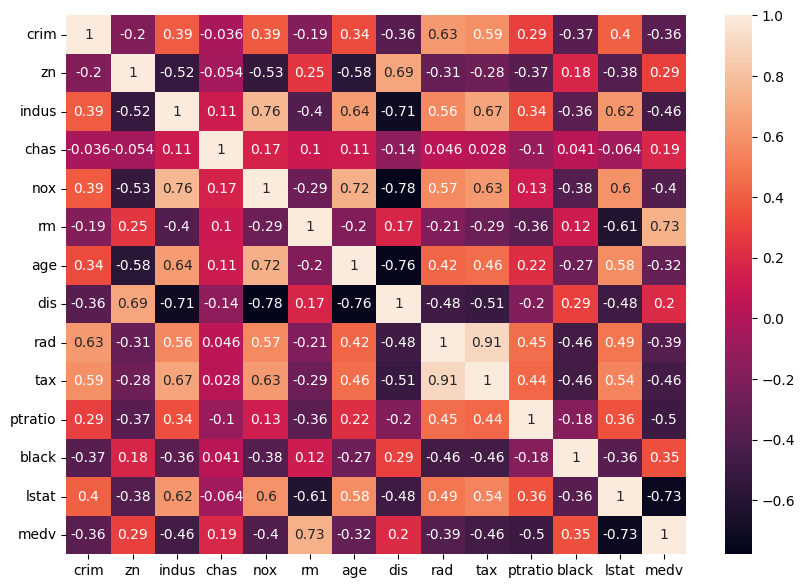

In [ ]:
#correlation
train = pd.concat([feature_train, target_train], axis=1)
corr = train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.show()

Jika menggunakan threshold correlation 0.7, tidak hanya `tax` dan `rad` saja yang terlihat memiliki korelasi tinggi, tetapi ada beberapa fitur lain seperti `nox`, `dis`, `indus` dan `age`. `Rad` akan didrop seperti pada pengerjaan sebelumnya. Karena memiliki korelasi yang paling besar dengan `medv`, diputuskan untuk mempertahankan fitur `indus` dan drop fitur `age`, `dis` dan `nox`.

In [ ]:
feature_train = feature_train.drop(['rad','age','dis','nox'], axis=1)
feature_val = feature_val.drop(['rad','age','dis','nox'], axis=1)
feature_test = feature_test.drop(['rad','age','dis','nox'], axis=1)

In [ ]:
X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.588941
2,zn,1.532709
3,indus,2.761396
4,chas,1.072011
5,rm,1.741200
6,tax,2.827007
7,ptratio,1.460082
8,black,1.343666
9,lstat,2.457787


In [ ]:
# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [ ]:
# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_train, y_train)
lasso_reg_pointone.fit(X_train, y_train)
lasso_reg_one.fit(X_train, y_train)
lasso_reg_ten.fit(X_train, y_train)

Lasso(alpha=10, random_state=42)

In [ ]:
X_val = feature_val.to_numpy()
y_val = target_val.to_numpy()
y_val = y_val.reshape(len(y_val),)

alphas = [0.01,0.1,1,10]

models_ridge = [ridge_reg_pointzeroone,
                ridge_reg_pointone,
                ridge_reg_one,
                ridge_reg_ten]

models_lasso = [lasso_reg_pointzeroone,
                lasso_reg_pointone,
                lasso_reg_one,
                lasso_reg_ten]

for model, alpha in zip(models_ridge, alphas):
  y_pred_val = model.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred_val, squared=False)
  print(f'RMSE dari Regresi Ridge dengan lambda = {alpha} adalah {rmse}')

for model, alpha in zip(models_lasso, alphas):
  y_pred_val = model.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred_val, squared=False)
  print(f'RMSE dari Regresi Lasso dengan lambda = {alpha} adalah {rmse}')

RMSE dari Regresi Ridge dengan lambda = 0.01 adalah 5.08928646079772
RMSE dari Regresi Ridge dengan lambda = 0.1 adalah 5.088571810656439
RMSE dari Regresi Ridge dengan lambda = 1 adalah 5.0816338864920825
RMSE dari Regresi Ridge dengan lambda = 10 adalah 5.027060618750645
RMSE dari Regresi Lasso dengan lambda = 0.01 adalah 5.085157906347982
RMSE dari Regresi Lasso dengan lambda = 0.1 adalah 5.059655909413482
RMSE dari Regresi Lasso dengan lambda = 1 adalah 4.8846734459521866
RMSE dari Regresi Lasso dengan lambda = 10 adalah 5.4330815297186374


In [ ]:
ridge_best = ridge_reg_ten

coef_df_ridge = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df_ridge

,feature,coefficient
0,intercept,7.107786
1,crim,-0.048538
2,zn,-0.016263
3,indus,0.057843
4,chas,2.140810
5,rm,5.216323
6,tax,-0.000235
7,ptratio,-0.870239
8,black,0.013113
9,lstat,-0.507393


In [ ]:
lasso_best = lasso_reg_one

coef_df_lasso = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df_lasso

,feature,coefficient
0,intercept,22.909724
1,crim,-0.028972
2,zn,-0.015200
3,indus,0.002053
4,chas,0.000000
5,rm,2.941434
6,tax,0.000029
7,ptratio,-0.805970
8,black,0.011680
9,lstat,-0.627903


In [ ]:
#evaluasi model ridge dengan data test
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

X_test = feature_test
y_test = target_test

y_pred_test = ridge_best.predict(X_test)

print(f'RMSE untuk data testing adalah {mean_squared_error(y_test, y_pred_test, squared=False)}')
print(f'MAE untuk data testing adalah {mean_absolute_error(y_test, y_pred_test)}')
print(f'MAPE untuk data testing adalah {mean_absolute_percentage_error(y_test, y_pred_test)}')

RMSE untuk data testing adalah 5.479324428233193
MAE untuk data testing adalah 3.406233090923041
MAPE untuk data testing adalah 0.18294676209435864


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [ ]:
#evaluasi model lasso dengan data test
X_test = feature_test
y_test = target_test

y_pred_test = lasso_best.predict(X_test)

print(f'RMSE untuk data testing adalah {mean_squared_error(y_test, y_pred_test, squared=False)}')
print(f'MAE untuk data testing adalah {mean_absolute_error(y_test, y_pred_test)}')
print(f'MAPE untuk data testing adalah {mean_absolute_percentage_error(y_test, y_pred_test)}')

RMSE untuk data testing adalah 5.33956016704644
MAE untuk data testing adalah 3.572900527120014
MAPE untuk data testing adalah 0.18399301988769076


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Terlihat bahwa setelah threshold correlation diturunkan dan lebih banyak fitur yang di-drop, performa model (baik untuk Ridge maupun Lasso) justru memburuk (MAPE berkisar 18.3%, berbeda dari yang sebelumnya berkisar 17.8%)